In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
df = pd.read_csv('Housing.csv')
X = df.drop('price', axis=1)
y = df['price']

In [4]:
print(X)


     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

In [5]:
print(y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler


binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
category_col = ['furnishingstatus']
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']


ct = ColumnTransformer(
    transformers=[
        ('binary', OrdinalEncoder(), binary_cols),
        ('cat', OneHotEncoder(drop='first'), category_col),
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'
)


X = ct.fit_transform(X)



In [7]:
column_names = ct.get_feature_names_out()
X_check = pd.DataFrame(X, columns=column_names)
print(X_check.head())

   binary__mainroad  binary__guestroom  binary__basement  \
0               1.0                0.0               0.0   
1               1.0                0.0               0.0   
2               1.0                0.0               1.0   
3               1.0                0.0               1.0   
4               1.0                1.0               1.0   

   binary__hotwaterheating  binary__airconditioning  binary__prefarea  \
0                      0.0                      1.0               1.0   
1                      0.0                      1.0               0.0   
2                      0.0                      0.0               1.0   
3                      0.0                      1.0               1.0   
4                      0.0                      1.0               0.0   

   cat__furnishingstatus_semi-furnished  cat__furnishingstatus_unfurnished  \
0                                   0.0                                0.0   
1                                   0.0     

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [9]:
print(X_train)

[[ 1.          1.          1.         ... -0.57018671 -0.92939666
   1.51769249]
 [ 1.          0.          1.         ... -0.57018671  0.22441013
  -0.80574124]
 [ 0.          0.          1.         ... -0.57018671 -0.92939666
  -0.80574124]
 ...
 [ 1.          0.          0.         ... -0.57018671  2.53202371
  -0.80574124]
 [ 1.          1.          0.         ... -0.57018671  0.22441013
   0.35597563]
 [ 1.          0.          0.         ...  1.42181174  2.53202371
   1.51769249]]


In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree = 3)
X_poly = poly_features.fit_transform(X)


lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

print(X_poly.shape[1])
print(lin_reg_2.score(X_poly, y))

560
0.9335075912464691


In [11]:

new_house_raw = pd.DataFrame([{
    'area': 8000,
    'bedrooms': 4,
    'bathrooms': 3,
    'stories': 2,
    'mainroad': 'yes',
    'guestroom': 'no',
    'basement': 'no',
    'hotwaterheating': 'yes',
    'airconditioning': 'no',
    'parking': 2,
    'prefarea': 'yes',
    'furnishingstatus': 'semi-furnished'
}])

new_data_ct = ct.transform(new_house_raw)
new_data_poly = poly_features.transform(new_data_ct)
price = lin_reg_2.predict(new_data_poly)

print(f" {price[0]:,.2f}")

 16,657,808.51


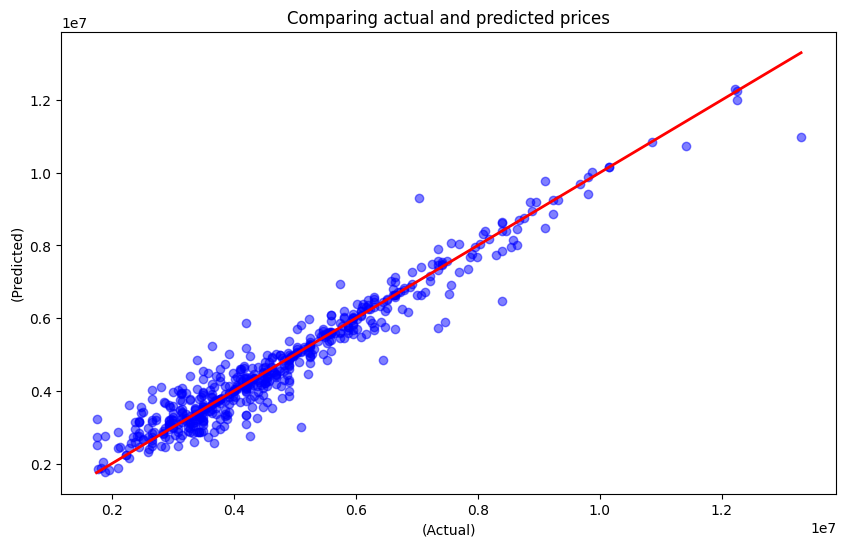

In [12]:

y_pred = lin_reg_2.predict(X_poly)


plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.xlabel('(Actual)')
plt.ylabel('(Predicted)')
plt.title('Comparing actual and predicted prices')
plt.show()

In [13]:

X_test_poly = poly_features.transform(X_test)


y_pred = lin_reg_2.predict(X_test_poly)


from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9328030499291253


In [14]:

train_score = lin_reg_2.score(poly_features.transform(X_train), y_train)


test_score = r2_score(y_test, y_pred)

print(f"train {train_score}")
print(f"test {test_score}")

train 0.9337302682323253
test 0.9328030499291253


In [15]:
import joblib


joblib.dump(ct, 'column_transformer.pkl')
joblib.dump(poly_features, 'polynomial_converter.pkl')
joblib.dump(lin_reg_2, 'housing_model.pkl')

print("save model ✅")

save model ✅
